# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import math
import random

TEN_TO_FIVE = int(math.pow(10, 5))
TEN_TO_FOURTEEN = int(math.pow(10, 14))

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(self.lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


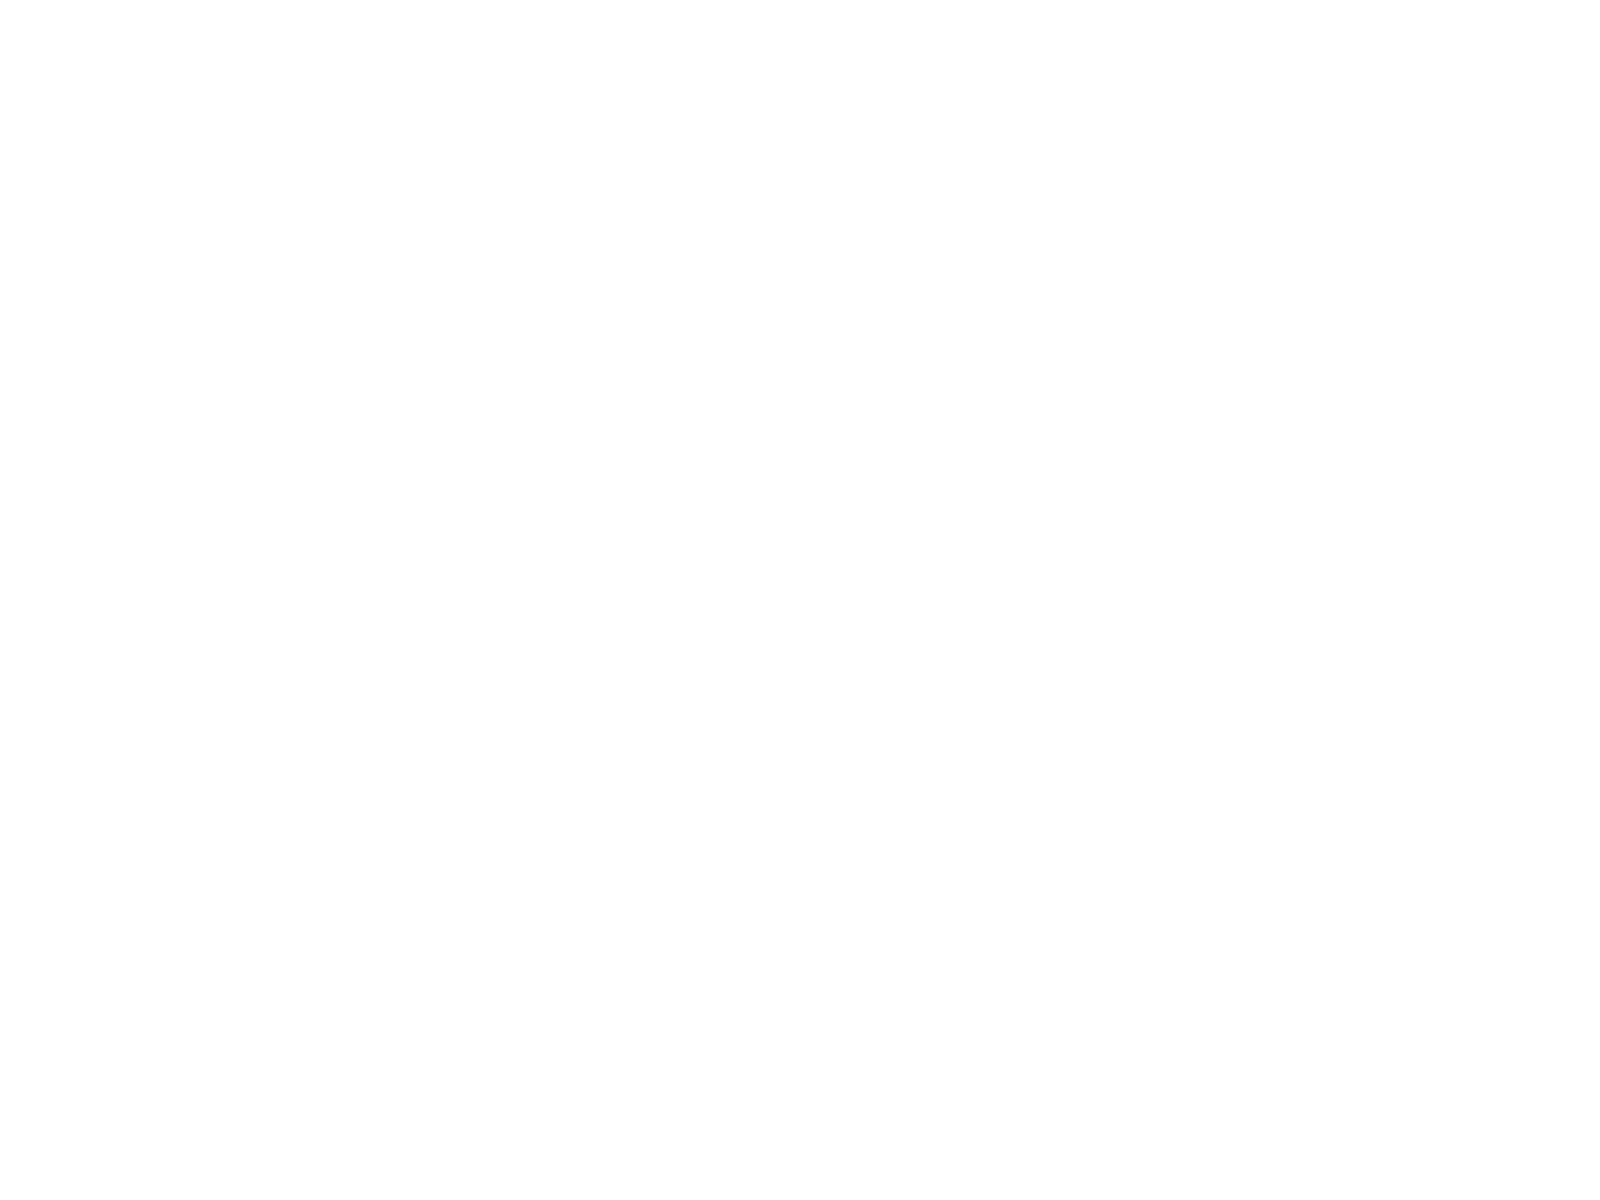

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

#### Funkcje słóżące do generowania list losowych punktów
Funkcja pozwalają na sprecyzowanie przedziału losowania dla obu współżędnych osobno

In [4]:
def generate_random_point(range_a, range_b):
    return (random.uniform(range_a[0], range_a[1]),random.uniform(range_b[0], range_b[1]))

def generate_point_on_circle(angle_range, radius_range):
    angle = random.uniform(angle_range[0], angle_range[1])
    radius = random.uniform(radius_range[0], radius_range[1])
    return (math.cos(angle)*radius, math.sin(angle)*radius)

def generate_array_of_random_points(n, range_x, range_y=None, generator=generate_random_point):
    points = []
    if range_y is None:
        range_y = range_x
    for i in range(0, n):
        points.append(generator(range_x, range_y))
    return points


#### a) 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000]

<IPython.core.display.Javascript object>


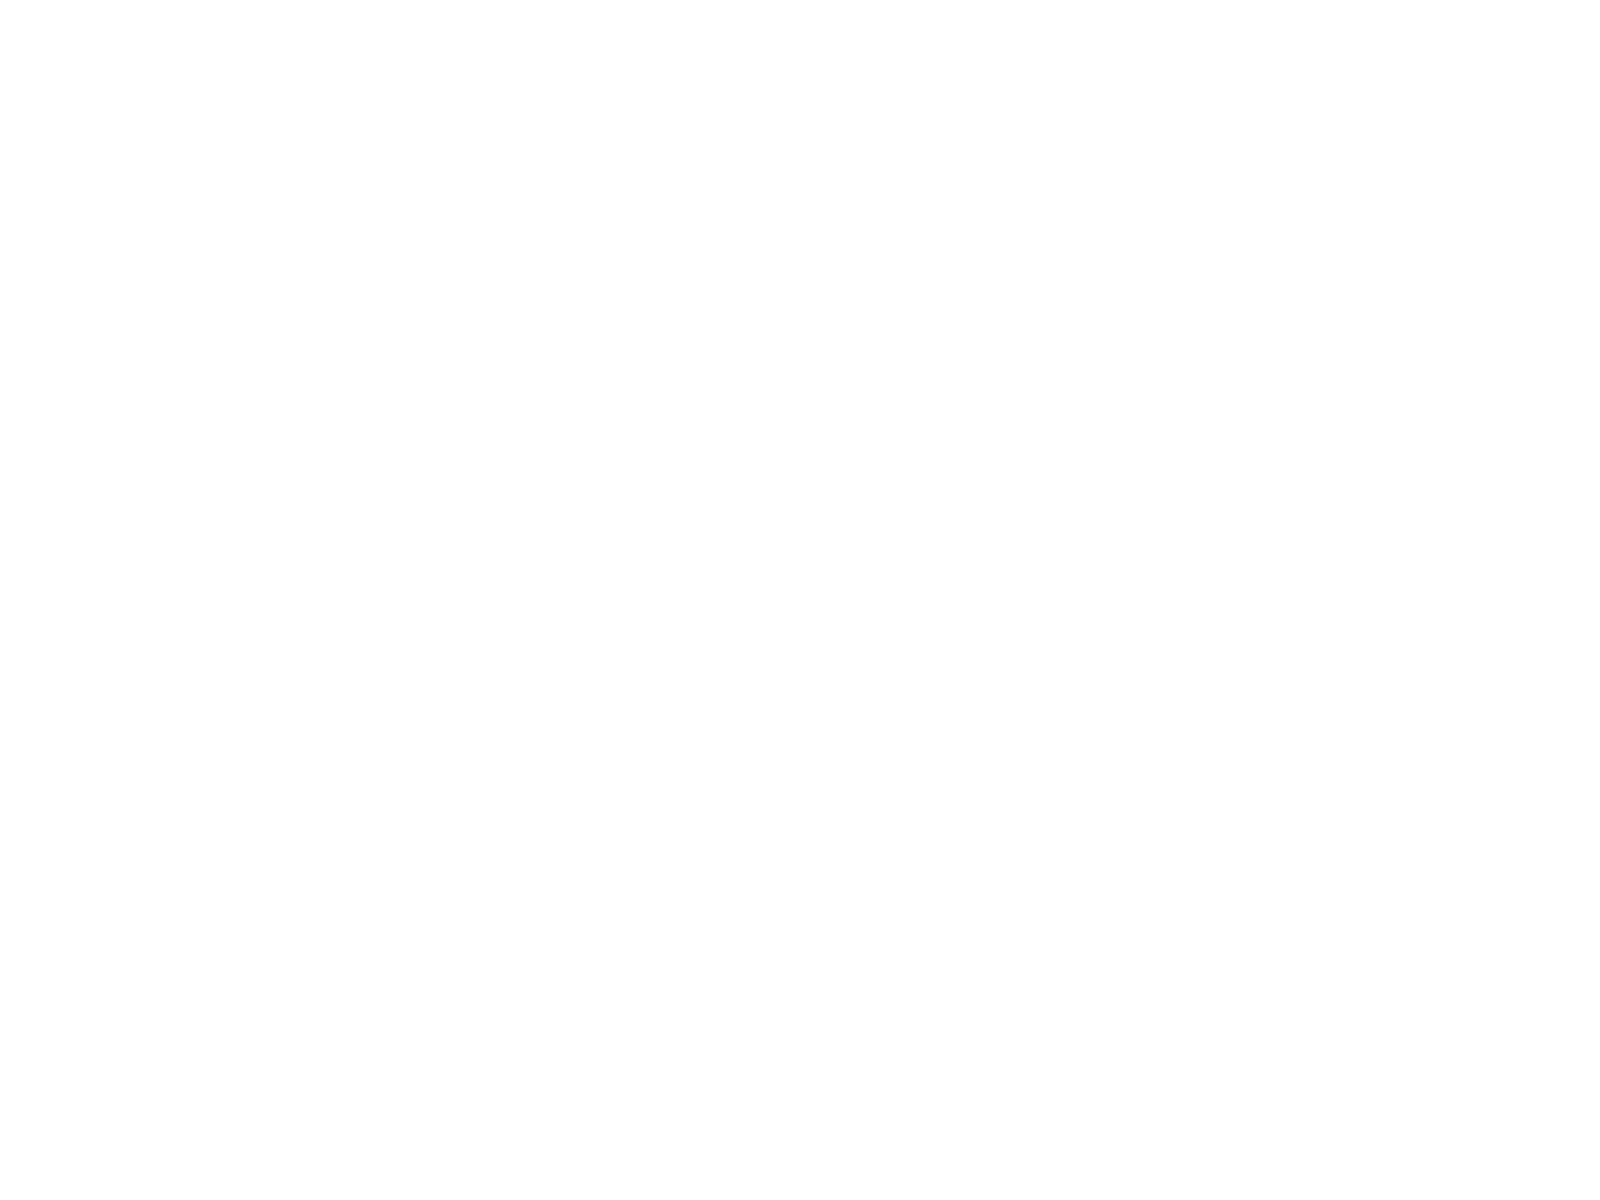

In [5]:
%matplotlib notebook

points_1 = generate_array_of_random_points(TEN_TO_FIVE,(-1000,1000))
plot1 = Plot([PointsCollection(points_1, color="green")])
plot1.draw()

#### b) 10^5 losowych punktów o współrzędnych z przedziału [-10^14, 10^14], 

<IPython.core.display.Javascript object>


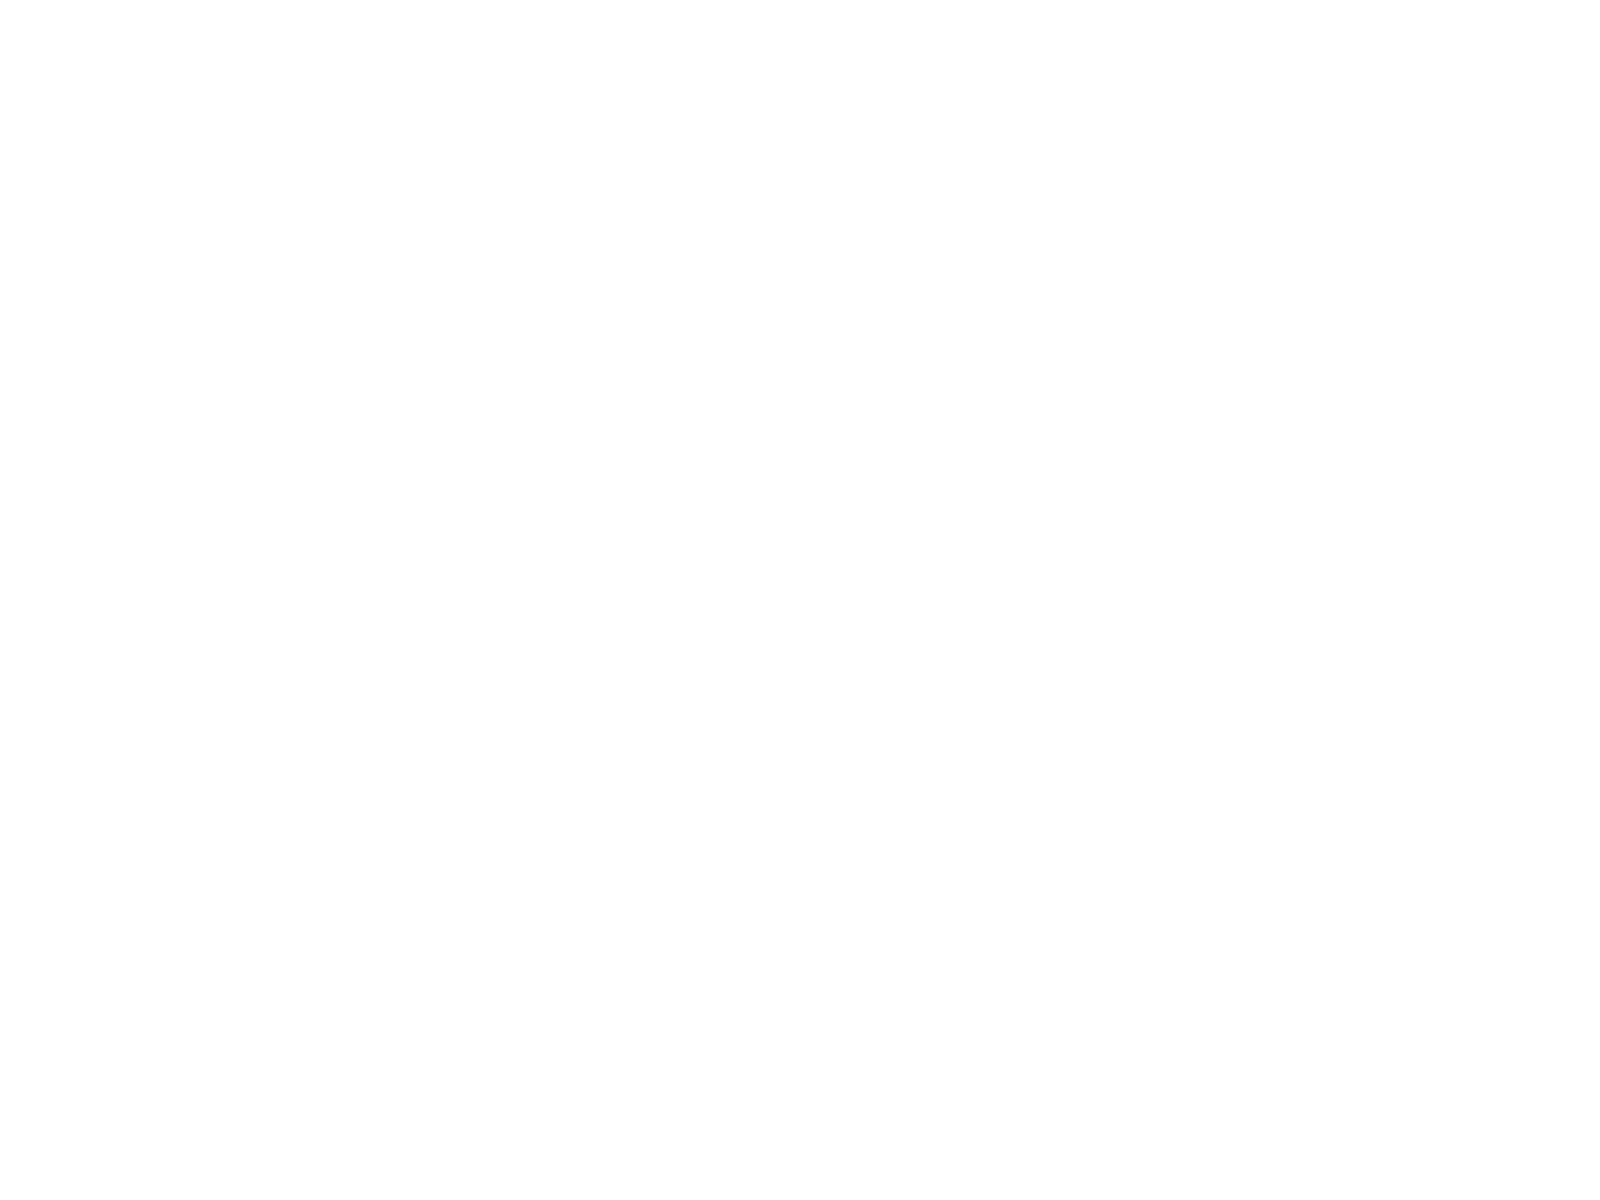

In [6]:
points_2 = generate_array_of_random_points(TEN_TO_FIVE,((-1)*TEN_TO_FOURTEEN,TEN_TO_FOURTEEN))
plot2 = Plot([PointsCollection(points_2, color="blue")])
plot2.draw()

#### c) 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100, 

<IPython.core.display.Javascript object>


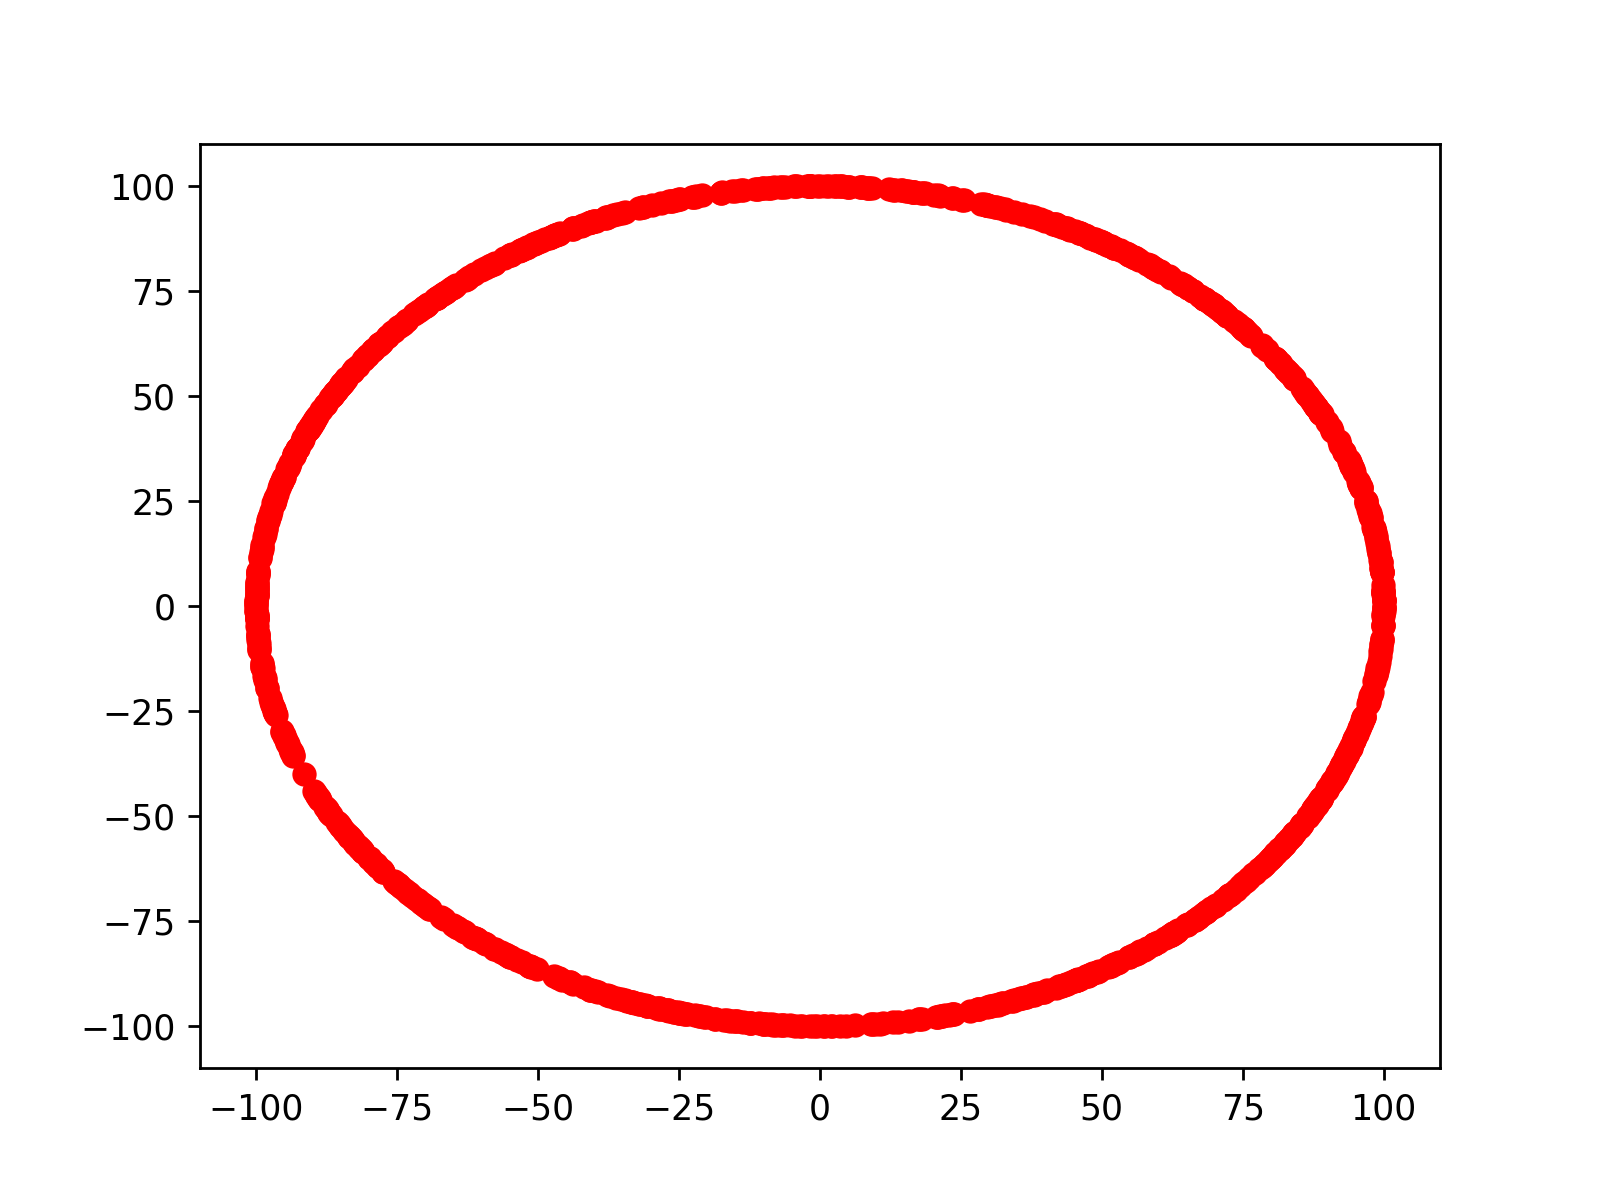

In [7]:
%matplotlib notebook

points_3 = generate_array_of_random_points(1000,(0,2*math.pi),(100,100), generate_point_on_circle)
plot3 = Plot([PointsCollection(points_3, color="red")])
plot3.draw()